<a href="https://colab.research.google.com/github/HanlunAI/ATasteOfDeepLearning/blob/main/ST5_003_Frontiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Taste of Deep Learning through Python 
## Session 3: The Frontiers

The frontiers of Deep Learning had diversified battle lines due to its multidisciplinary nature. So this notebook would be like a zoo with efforts coming from a broad range. Hopefully, by the end of the workshop, each audience would find something of his/her own interest and later make an informed decision to pursue a meaningful future goal from here. For general information, [this youtube channel](https://www.youtube.com/channel/UCbfYPyITQ-7l4upoX8nvctg) and [this website](https://paperswithcode.com/) collected a lot of state-of-the-art/up-to-date information. 

### 3.1 Frontier in Academia: Physical System and PDE

*Special Thanks to William Cheong for introducing Weinan E et al.'s [Deep Ritz method](https://arxiv.org/abs/1710.00211)* and to XXX for starter codes.

Let's look at other problems that we can apply the neural network. Consider that following problem:
\begin{equation}
\Delta u = -1
\end{equation}
The triangular symbol might seems daunting, but it would be intuitive in a minutes, we have to clear up a few things first:
- Multivariable function
- Laplacian/ second derivative

####Multivariable function
$u(x,y)$ is a multivariable function, it takes $x$ and $y$ and give out a value. If we take all the value of $x,y$ in the $xy$-plane, we can plot the function in 3 dimension. Please refer to **Part A** of [the variants notebook](https://github.com/HanlunAI/ATasteOfDeepLearning/blob/main/ST5_Variants.ipynb) for plotting different surfaces.

###Laplacian
Let's recall the interpretation of concavity in some simpler function. For a simple quadratic function:
\begin{equation}
y = ax^2 +bx + c
\end{equation}
For example, the blue curve below are $y=x^2$ where $a=1>0$, so it concave upwards, orange curve are $y=-x^2$ where $a=-1 < 0$, so it concave downwards.

For those of you who know basic calculus, the second derivative also represents the concavity of function:
\begin{equation}
y = ax^2+bx+c \Rightarrow\frac{d^2y}{dx^2} = 2a
\end{equation}

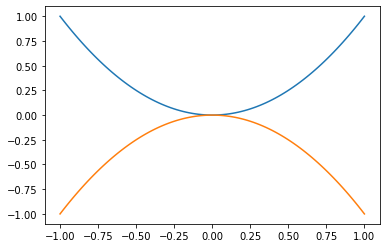

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1,1,100)
y = x**2
z = -x**2
plt.plot(x,y)
plt.plot(x,z)

The Laplcaian operator represent similar things, but with function with higher dimensional input (2D). Intuitively, you can see the what is the sign(positive/negative) of the laplacian of the following function (by using the above plot):
\begin{equation}
u(x,y) = x^2+y^2 - 10\\
u(x,y) = -x^2-y^2 + 10
\end{equation}

Obviously, the first one concave upwards and the second one concave downwards.  
For you information their laplacians are $4$ and $-4$.

And that is enough information for us to do the reverse process: finding the function $u$ with given Partial Differential Equation (Poisson Equation):
\begin{equation}
\Delta u = -1
\end{equation}
For those of you who see the linearity in this operator, you could probably easily come up with solution like: $u(x,y)=-\frac{x^2+y^2}{4}$, but this is not enough, there are too many degree of freedom for us in this solution. You can see that $u(x,y)=-\frac{x^2+y^2}{4}+100$ would also be a solution, becuase the Poisson Equation only describe the shape (concave downwards) but not the position (height) of the solution. That is why we need something called a boundary condition, the final equation become:
\begin{gather*}
-\Delta u(x,y)=1, \hspace{3cm}x\in \Omega\\
u(x,y)=0, \hspace{3cm}x\in \partial\Omega
\end{gather*}
$\Omega=(-1,1)\times(-1,1)$&#92;$[0,1)$


In words, Omega $\Omega$ means the area inside in the below graph, the blue line is the boundary ($\partial\Omega$). Two things we need to satisfy:
- Inside the domain($\Omega$): we need to satisfy the Poisson equation (concave downwards).
- At the boundary ($\partial\Omega$): We need the function output to be zero.

So you can expect a certain surface that are stick to zero at the blue line and raise up to convex downward inside the area.

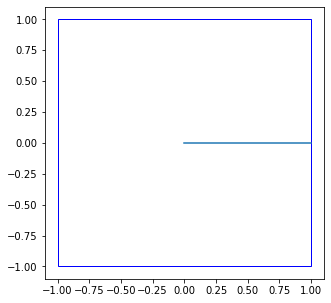

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
ax.plot([0, 1],[0, 0])
ax.add_patch(Rectangle((-1, -1), 2, 2,edgecolor = 'blue',fill = False))
plt.show()

Partial Differential Equation is a complicated subject, even in numerical methods, so we have to borrow some alerady established result in mathematics. Here we will state, without proof, the weak formulation of Poisson Equation.


\begin{gather*}
-\Delta u |_{\Omega}=f(x)
\hspace{1cm} \Leftrightarrow \hspace{1cm}
\min_{u}{\int_{\Omega} \left(\frac{1}{2}|\nabla u(x)|^2-f(x)u(x) \right) dx}
\end{gather*}
$\Omega=(-1,1)\times(-1,1)$&#92;$[0,1) \hspace{5mm}, f(x) = 1$

It seems like we introduce two more symbols at once: 
- Gradient $\nabla u$
- Integration $\int f(x) dx$

The gradient is a vector, if you visualize the multivariable function as a terrain of certain area, gradient point at the direction of quickest ascend and the magnitude of how quick it ascend. Basically if you want to walk up a hill area, how fast is it.

The integration here measure the volume under the curve. We can apply Monte Carlo method.

To be specific, it is written as:
\begin{gather*}
\min_{u}\int_{-1}^1 \int_{-1}^1 \left(\frac{1}{2}|\nabla u(x,y)|^2-u(x,y) \right) dxdy
\end{gather*}

For the boundary condition, penalty method is implemented, the weak form then become the following:

\begin{gather*}
\min_{u}\int_{-1}^1 \int_{-1}^1 \left(\frac{1}{2}|\nabla u(x,y)|^2-u(x,y) \right) dxdy + 500\int_{\partial \Omega} u(x,y)^2 ds
\end{gather*}

That is all we need to know to estimate the solution. From all the examples of previous sections, you can see that deep learning can be applied when:
- Approximate some function (classification, regression, function)
- Optimize some other (loss/ measure of error) function 

In this case, we want to approximate the solution $u(x,y)$, which can minimize the weak form, that is how we know that deep learning can be applied. Then we can leave the whole process to python.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim, autograd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
class PowerReLU(nn.Module):                          #Activation function: max(0,x^3)
    """
    Implements simga(x)^(power) : Applies a power of the rectified linear unit element-wise.
    INPUT:  x -- size (N,*) tensor where * is any number of additional dimensions
    OUTPUT: y -- size (N,*)     
    """
    def __init__(self, inplace=False, power=3):      #nn.Module: class for neural network
        super(PowerReLU, self).__init__()
        self.inplace = inplace
        self.power = power
    def forward(self, input):
        y = F.relu(input, inplace=self.inplace)      #Relu function element-wise max(0,x)
        return torch.pow(y, self.power)              #Cubic --> max(0,x^3)


In [ ]:
class Block(nn.Module):
    """
    Implementation of the block used in the Deep Ritz Paper
    Parameters:
    in_N  -- dimension of the input
    width -- number of nodes in the interior middle layer
    out_N -- dimension of the output
    phi   -- activation function used"""
    def __init__(self, in_N, width, out_N, phi=PowerReLU()):
        super(Block, self).__init__()
        self.L1 = nn.Linear(in_N, width)      # create the necessary linear layers
        self.L2 = nn.Linear(width, out_N)     
        self.phi = nn.Tanh()                  # choose appropriate activation function: tanh(x), power relu...
    def forward(self, x):
        return self.phi(self.L2(self.phi(self.L1(x)))) + x

In [ ]:
class drrnn(nn.Module):
    """
    drrnn -- Deep Ritz Residual Neural Network
    Implements a network with the architecture used in the deep ritz method paper
    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function"""
    def __init__(self, in_N, m, out_N, depth=4, phi=PowerReLU()):
        super(drrnn, self).__init__()
        self.in_N = in_N              # set parameters
        self.m = m                   
        self.out_N = out_N    
        self.depth = depth
        self.phi = nn.Tanh()
        self.stack = nn.ModuleList() # list for holding all the blocks
        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))
        # add middle blocks to list
        for i in range(depth):
            self.stack.append(Block(m, m, m))
        # add output linear layer
        self.stack.append(nn.Linear(m, out_N))
    def forward(self, x):
        # first layer
        for i in range(len(self.stack)):
            x = self.stack[i](x)
        return x

In [ ]:
def get_interior_points(N=128,d=2):
    """randomly sample N points from interior of [-1,1]^d"""
    return torch.rand(N,d) * 2 - 1                                              #rand(N,d) gives random number between 0 and 1
def get_boundary_points(N=33):
    """Sample boundary points"""
    index = torch.rand(N, 1)
    index1 = torch.rand(N,1) * 2 - 1
    xb1 = torch.cat((index, torch.zeros_like(index)), dim=1)
    xb2 = torch.cat((index1, torch.ones_like(index1)), dim=1)
    xb3 = torch.cat((index1, torch.full_like(index1, -1)), dim=1)
    xb4 = torch.cat((torch.ones_like(index1), index1), dim=1)
    xb5 = torch.cat((torch.full_like(index1, -1), index1), dim=1)
    xb = torch.cat((xb1, xb2, xb3, xb4, xb5), dim=0)
    return xb

def weights_init(m):
    # Initialize parameter
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.xavier_normal_(m.weight)
        nn.init.constant_(m.bias, 0.0)

In [ ]:
def main():

    epochs = 50000

    in_N = 2
    m = 10
    out_N = 1

    print(torch.cuda.is_available())
    device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')
    model = drrnn(in_N, m, out_N).to(device)                                    #Construct neural network with given dimension
    model.apply(weights_init)                                                   #Initialize parameter
    #criteon = nn.MSELoss()                                                     #
    optimizer = optim.Adam(model.parameters(), lr=3e-3)                         #Adam optimization algorithm
    print(model)

    best_loss, best_epoch = 1000, 0                                             #Baseline for least loss(over-est) and greatest number of epoch(under-est)
    for epoch in range(epochs+1):
        xr = get_interior_points().to(device)                                   #Generate data 
        xb = get_boundary_points().to(device)             

        xr.requires_grad_()                                                     #The data that grad in loss function with respect to
        output_r = model(xr)
        output_b = model(xb)
        grads = autograd.grad(outputs=output_r, inputs=xr,
                              grad_outputs=torch.ones_like(output_r),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]

        loss_r = 0.5 * torch.sum(torch.pow(grads, 2),dim=1)- output_r
        loss_r = torch.mean(loss_r)
        loss_b = torch.mean(torch.pow(output_b,2))
        loss = 4 * loss_r + 9 * 500 * loss_b                                    #Loss function

        optimizer.zero_grad()                                                   #Clear gradient for every parameter theta
        loss.backward()                                                         #Compute the derivative of loss w.r.t. every parameter which has requires_grad = True --> accumulate into theta.grad
        optimizer.step()                                                        #Perform a single optimization step

        if epoch % 1000 == 0:
            print('epoch:', epoch, 'loss:', loss.item(), 'loss_r:', (4 * loss_r).item(), 'loss_b:', (9 *500 * loss_b).item())
            if epoch > int(4 * epochs / 5):                                     #Choose the best epoch within last 20% of epoch
                if torch.abs(loss) < best_loss:                                 #Find the best loss
                    best_loss = torch.abs(loss).item()
                    best_epoch = epoch
                    torch.save(model.state_dict(), 'new_best_deep_ritz1.mdl')
    print('best epoch:', best_epoch, 'best loss:', best_loss)

    # plot figure 
    model.load_state_dict(torch.load('new_best_deep_ritz1.mdl'))
    print('load from ckpt!')
    with torch.no_grad():
        x1 = torch.linspace(-1, 1, 1001)
        x2 = torch.linspace(-1, 1, 1001)
        X, Y = torch.meshgrid(x1, x2)
        Z = torch.cat((Y.flatten()[:, None], Y.T.flatten()[:, None]), dim=1)
        Z = Z.to(device)
        pred = model(Z)

    plt.figure(figsize=(8,8))
    pred = pred.cpu().numpy()
    pred = pred.reshape(1001, 1001)
    ax = plt.subplot(1, 1, 1)
    h = plt.imshow(pred, interpolation='nearest', cmap='rainbow',
                   extent=[-1, 1, -1, 1],
                   origin='lower', aspect='equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(h, cax=cax)
    plt.show()

    # plot 3D
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    import numpy as np
    x = np.linspace(-1,1,1001)
    y = np.linspace(-1,1,1001)
    X,Y = np.meshgrid(x,y)
    ax.plot_surface(X,Y,pred,cmap='hot')
    plt.show()
  


False
drrnn(
  (phi): Tanh()
  (stack): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (2): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (3): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (4): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (5): Linear(in_features=10, out_features=1, bias=True)
  )
)
epoch: 0 loss: 9893.947265625 loss_r: 13.539260864257812 loss_b: 9880.408203125
best epoch: 0 best loss: 1000
load from ckpt!


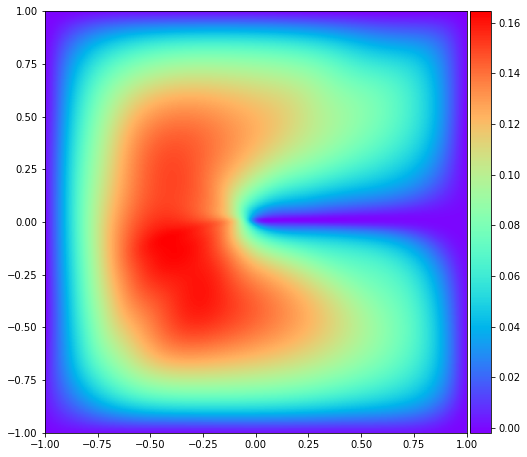

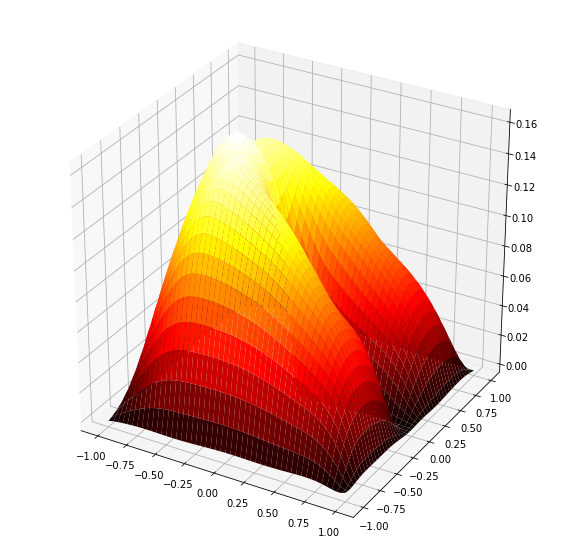

In [ ]:
if __name__ == '__main__':
    main()

### 3.2 More Use Cases

**3.2.1 Video time again**

For many decades, traditional numerical methods such as [finite element method](https://en.wikipedia.org/wiki/Finite_element_method) had dominated computational simulation of physical systems. But now deep learning is getting into play of with orders of magnitude higher efficiency and just a little bit loss in accuracy. Please enjoy a simulation on youttube in the next code cell:

In [ ]:
from IPython.display import HTML
HTML('<iframe width="960" height="540" src="https://www.youtube.com/embed/2Bw5f4vYL98" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


**3.2.2 What's more**

More generally, [here is a survey](https://arxiv.org/abs/1905.11075) of the employment of general machine learning technique in computational fluid mechanics.

Notably, the video we've seen is part of [DeepMind](https://www.deepmind.com/)'s research (Yes, they have done a lot of work alongside with the success of AlphaGo). In the frontiers, industry is playing an important role and there are more companies to watch out: [Andrew Ng](https://en.wikipedia.org/wiki/Andrew_Ng)'s [Landing AI](https://landing.ai/),  [Jürgen Schmidhuber](https://www.youtube.com/watch?v=-Y7PLaxXUrs&t=553s)'s [nnaisense](https://nnaisense.com/), GPU company [Nvidia](https://www.nvidia.com/en-us/research/), and many other big tech companys, the list goes on... 

Though we have been concerned with pricing data analytics, computer vision and physical system simulation in previous sessions; AI has much broader application. An important aspect is Natural Language Processing (NLP) and some open resource is offered by [Open AI](https://openai.com/)'s [GPT3](https://gpt3demo.com/). In our city, [LSCM](https://www.lscm.hk/eng/) also has some good [NLP project](https://drive.google.com/file/d/1_eQhImK-y46UjStakHD-yApU82a0WQLX/view?usp=sharing)s. 

Several local universities are offering both Bachelor and [Master program](https://hkumath.hku.hk/web/mscai/mindex.php) in this area. For oversea programs, here is [a list of popular choices](https://pub.towardsai.net/best-universities-for-artificial-intelligence-ai-programs-3c22cd3e9179).


### 3.3 News from our side

**3.3.1 Real World Measurement**

For construction site monitoring, we took part in OFCA’s Subsidy Scheme for Encouraging Early Deployment of 5G for a project related to audio classification: https://drive.google.com/file/d/1BK4M3ngQjjKAT5XoC9b7_7x8uf0zPg6P/view?usp=sharing

In endeavor of utilize existing measurement methodology by modern data analytics capability. We also built some projects work in the direction of enhancing output data quality. One is on the [sound leakage visualization](https://drive.google.com/file/d/1azLgBy0VrMIaEBRJMo6aBUs-0hSMIIij/view?usp=sharing); and one on [plantar pressure visualization](https://docs.google.com/presentation/d/1yTY00OFeWtj1qGcDZfUld1r58iSiJJjH5GW9-GaFMPs/edit?usp=sharing).

![picture](https://drive.google.com/uc?id=1sIDZTZS6tR66_CBIlScMxEtosd0vdZQT)




**3.3.2 Hold On: Recreational Application**

At another time, we combined body-parts segmentation technique from deep learning and [moving objects detection technique](https://www.researchgate.net/publication/2557021_An_Improved_Adaptive_Background_Mixture_Model_for_Realtime_Tracking_with_Shadow_Detection) from Gaussian Mixtures for a Tai Chi motion sensing application. Later, we repurpose that moving object detection part into a camera with artistic effect upon holding on your phone. 

![picture](https://drive.google.com/uc?id=1T4ySaPziUjXusDOzZwIzvoP1NHPkzpuM)

Please feel free to download and play with the [Android verion by clicking here](https://play.google.com/store/apps/details?id=com.hanlun.holdon).

### 3.4 Humanity

Having seen how computer technology were used to do some mathematics to tackle science and engineering tasks, we should bear in mind that all these are done for the prospect of humanity. 

**3.4.1 Google Form**
https://docs.google.com/forms/d/e/1FAIpQLSclquykJA5CNWTMPVGiDMI4nswdMEH5Vzf2r8reXXT3IwGH1w/viewform?usp=sf_link

**3.4.2 Other Acronyms**: STEM, [THAMES](https://link.springer.com/article/10.1007/s11858-022-01375-1) (Siu 2022)

**3.4.3 What's Past is Prologue**

To Be Continued...